## Machine Learning in Sklearn Basics

Machine Learning (ML) is about creating model from data. In most circumstances our data is in a basic table format. Sklearn accepts such two-dimensional data in which each row represents individual elements of the data and the columns represent properties related to those elements. This table layout is also referred to as __Feature Matrix__. Feature matrix is most often contained in a NumPy `ndarray` or a Pandas `DataFrame` and will have a shape of `[n_samples, n_featuers]`, which refers to the number of rows and the number of columns respectively. Feature matrix is often stored as `X`.

In addition to the feature matrix `X`, there can also be a __label__ or __target array__, conventionally stored as `y`. The target array is the quantity we want to predict from the data. Thus, the target array is present in a __supervised learning implementation__. The target array is usually a one-dimensional object, has the same length as `n_samples` and is often contained in a NumPy `ndarray` or a Pandas `Series`. The target value may be continuous numerical values or discrete classes/categories. When the target is continous value it is a __regression problem__ and when the target is discrete value, it is a __classification problem__.

With this is mind, lets load our dataset and explore.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The data provides information on advertising expenditure and sales by market. It is taken from [Kaggle](https://www.kaggle.com/ashydv/advertising-dataset). Each row represent a market. The first three columns represent advertising dollar (in thousands of dollar) spent for a single product in a given market. The last column represents sales (in thousands) of a single product in a given market.  

So here we want to analyze how the company should spend its advertising budget to increase the number of sales. To do so we can look at a couple of things:

* Is there any relationship between ads and sales? If so, how strong is the relationship?
* Which ad type contributes to highest sales?
* Can we predict sales based on ad spending?

Since we are using the advertising data to predict sales, sales is our target and the first three columns make up our feature matrix.

In [5]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

print(X.shape)
print(y.shape)

(200, 3)
(200,)


To answer the first question, we can begin by visualizing our data in a scatter plot.

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

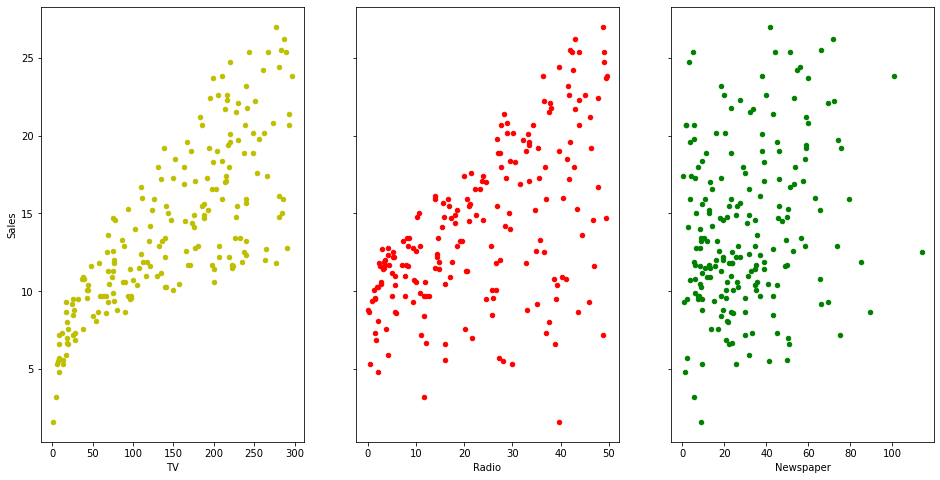

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axes = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axes[0], figsize=(16, 8), c='y')
data.plot(kind='scatter', x='Radio', y='Sales', ax=axes[1], c='r')
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axes[2], c='g')

We can also calculate the correlation between each ad type and sales using the [`corr` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) of pandas Dataframe. 

__Correlation__ is a statistical relationship, whether causal or not, between two random variables ([wikipedia](https://en.wikipedia.org/wiki/Correlation)). It gives us an indication on how strong or weak is the linear relationship between two variables. Corelation coefficient can range from -1 to +1. Positive correlation means that increasing one of the variable leads to an increase in the other variable as well, while negative correlation means that increasing one of the variable leads to a decrease in the other variable.

In [7]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


We see that correlation between ad type TV and Sales is 0.78, which is a positive correlation and is higher than that of other two ad types. We can select ad type TV only for now to see how well its can predict sales. To do so, we will fit a Linear Regression model to this data. 

## Linear Regression

Linear Regression is the most used statistical algorithm. It examines a linear relationship between two or more variables. Linear Regression provides a good background in understanding a whole class of linear models known as Generalized Linear Models (GLM). It also helps understand statistical terms such as cost functions, coefficients and optimization. 

The overall objective of Linear Regression is to predict a straight line through the data, such that the vertical distance of each data point is minimal from that line. So in this case we will predict the sales in a given market based on the advertising dollar spent on TV.

In [8]:
X_tv = X['TV']
X_tv.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

### Simple Linear Regression

* Regression approach that uses a single feature (predictor) to predict a quantitative response (predictand). 
* The simple linear regression equation takes the form: $\hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}x $ (derived from equation of a straight line: $y = mx + c $)
    * where $\hat{y}$ is the predicted sales and $x$ is the spending on ad type TV
    * $\hat{\beta}_{0}$ is the intercept (value of sales when  spending on ad type TV is 0)
    * $\hat{\beta}_{1}$ is the slope or coefficient of ad type TV
* Our task then is to find the optimal values of the intercept and the coefficient. The resulting straight line is our __regression line__.
* We can use the principle of __Ordinary Least Squares__ to estimate these values. Based on this principle, we aim to minimize the total residual sum of squared distances between the target value and the predicted value. This is our cost function.

Sklearn provides [`Linear Regression` function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to implement this. Let's try that here! 

First, we will __split the data__ into training and test set. For that we can import [`train_test_split` 
function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `model_selection` module of the sklearn package. 

In [9]:
from sklearn.model_selection import train_test_split

Typically, a 80-20 split is recommended, where 80% of the data is used for training and 20% of remaining data is held back for testing. The `test_size` parameter takes on the latter value. The `random_state` parameter can be set to any whole number. This is done to ensure that we can replicate our results when we re-run the model again. 

In [10]:
Xtrain_tv, Xtest_tv, ytrain_tv, ytest_tv = train_test_split(X_tv, y, test_size=0.2, random_state=123)

Now we are ready to __train our algorithm__. Let's import the `LinearRegression` function from `linear_model` module of sklearn package.

In [11]:
from sklearn.linear_model import LinearRegression

Next, we must __create an instance__ of the `LinearRegression` model. Here, we can accept default arguments for all parameters or inside the parenthesis specify another argument for each parameter we want to change. 

In [12]:
lr = LinearRegression()

Then, we take the training data and fit this data to the selected model.

In [13]:
lr.fit(Xtrain_tv, ytrain_tv)

ValueError: Expected 2D array, got 1D array instead:
array=[ 62.3 280.7  78.2 265.6 228.3 164.5 177.  222.4 197.6 109.8 139.5 225.8
 293.6 141.3  75.5  85.7  66.1 276.9 120.5 239.3 239.8  90.4 175.7 140.3
   8.6 121.  187.8 134.3 266.9 102.7 248.8  97.5 131.7  76.4  93.9  25.1
  17.2 149.8   0.7  53.5 120.2 292.9 170.2   8.4  70.6 290.7 230.1 286.
 175.1 273.7 202.5 210.7 243.2  89.7  87.2   8.7  67.8 284.3  69.  213.4
 261.3  38.2  43.1 240.1 262.7 104.6  38.  218.5 163.5 220.5 110.7 199.8
  57.5 172.5 139.2 224.  234.5  94.2 206.8 193.7 109.8 237.4 214.7 139.3
 151.5  76.3 215.4  28.6  25.6 227.2  76.4 100.4  44.5  69.2  23.8 248.4
   7.3 262.9 296.4 206.9  59.6 187.9 204.1  36.9  75.1 232.1 199.1 195.4
 240.1  13.2  43.  210.8  16.9 131.1 216.8 166.8 265.2  27.5  95.7   4.1
 107.4 125.7 184.9 280.2 217.7 229.5 135.2 137.9  48.3 191.1 168.4 177.
 228.  213.5  17.2 198.9  66.9 237.4  39.5 117.2   5.4 149.7 171.3 241.7
 222.4  97.2 129.4 239.9 283.6 209.6 197.6 136.2 123.1  25.   68.4 281.4
 289.7  31.5   7.8 255.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Here, we received an error, which suggests that the method `fit` expects a 2D array and got 1D instead. This is simply a matter of reshaping the training data such that it can be in a feature matrix format we discussed above. 

In [14]:
print(Xtrain_tv.shape)
print(Xtrain_tv.ndim)

(160,)
1


In [15]:
Xtrain_tv = Xtrain_tv.values.reshape(-1,1)
print(Xtrain_tv.shape)
print(Xtrain_tv.ndim)
Xtrain_tv

(160, 1)
2


array([[ 62.3],
       [280.7],
       [ 78.2],
       [265.6],
       [228.3],
       [164.5],
       [177. ],
       [222.4],
       [197.6],
       [109.8],
       [139.5],
       [225.8],
       [293.6],
       [141.3],
       [ 75.5],
       [ 85.7],
       [ 66.1],
       [276.9],
       [120.5],
       [239.3],
       [239.8],
       [ 90.4],
       [175.7],
       [140.3],
       [  8.6],
       [121. ],
       [187.8],
       [134.3],
       [266.9],
       [102.7],
       [248.8],
       [ 97.5],
       [131.7],
       [ 76.4],
       [ 93.9],
       [ 25.1],
       [ 17.2],
       [149.8],
       [  0.7],
       [ 53.5],
       [120.2],
       [292.9],
       [170.2],
       [  8.4],
       [ 70.6],
       [290.7],
       [230.1],
       [286. ],
       [175.1],
       [273.7],
       [202.5],
       [210.7],
       [243.2],
       [ 89.7],
       [ 87.2],
       [  8.7],
       [ 67.8],
       [284.3],
       [ 69. ],
       [213.4],
       [261.3],
       [ 38.2],
       [

Now the data is ready for [`fit` method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit).

In [16]:
lr.fit(Xtrain_tv, ytrain_tv)

LinearRegression()

The data has been fit to a linear regression model and now we can explore some of the __model's properties__ to evaluate what was "learned" from the data.

In [17]:
print(f'intercept: {lr.intercept_}')
print(f'coefficients: {lr.coef_}')
print(f'R_squared: {lr.score(Xtrain_tv, ytrain_tv)}')

intercept: 7.181529756364786
coefficients: [0.04589456]
R_squared: 0.5919754429541753


The __intercept__ and the __coefficient__ are the estimated optimal values using the principle of ordinary least squares. The model suggests that for every one unit of change in spending on ad type TV, the change in sales is about 0.05%.

__R-squared__ is a goodness of fit measure for linear regression models. It ranges from 0 to 1, where 1 indicates perfect prediction for all variation in the target value and 0 indicates the predictor does not account for any variation in the target value. At R-squared value of about 0.6, the predictor ad type TV accounts for some variation in the target sales quantity. 

The next step is to use this model to __obtain model prediction__ on the test set. Sklearn provides the [`predict` method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) to do so. Let's also plot the regression line with test data.  

In [18]:
ypred_tv = lr.predict( Xtest_tv.values.reshape(-1,1) ) 

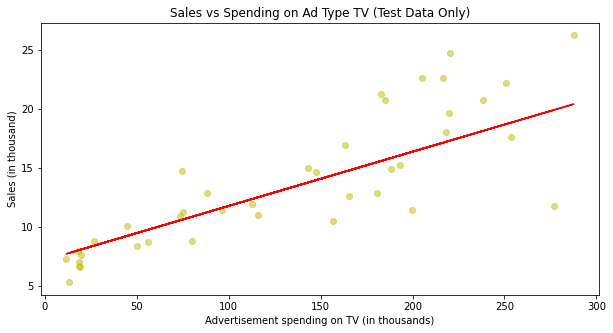

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(Xtest_tv, ytest_tv, c='y', alpha=0.5)
plt.plot(Xtest_tv, ypred_tv, c='red')
plt.xlabel('Advertisement spending on TV (in thousands)')
plt.ylabel('Sales (in thousand)' )
plt.title('Sales vs Spending on Ad Type TV (Test Data Only)')
plt.show()

We have the predictions made by our linear regression model. Now the final step is to __evaluate model performance__ on the test set. Root Mean Squared Error (RMSE) is a popular metric to evaluate regression based models. 

Sklearn provides numerous model evaluation metrics in its `metrics` module, including the [`mean_squared_error` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). We can import this function and the `square root` function from the [`math`](https://docs.python.org/3/library/math.html#module-math) module to obtain the square root of the Mean Squared Error (MSE).

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
mse_tv = mean_squared_error(ytest_tv, ypred_tv)
rmse_tv = sqrt(mse_tv)
print(rmse_tv)

3.182007792060533


Machine learning models are evaluated against some __benchmark model__. This benchmark model can be an existing model in use. In our case, we can use a naive benchmark such as the average sales. 

In [22]:
yavg_tv = ytrain_tv.mean()
print(yavg_tv)

n = len(Xtest_tv)
yavg_tv = np.full(n, yavg_tv)
print(len(yavg_tv))
yavg_tv[:10]

14.095000000000002
40


array([14.095, 14.095, 14.095, 14.095, 14.095, 14.095, 14.095, 14.095,
       14.095, 14.095])

Let's calculate the RMSE of this naive model and compare that with the linear regression model's RMSE.

In [23]:
rmseavg_tv = sqrt(mean_squared_error(ytest_tv, yavg_tv))
print(rmseavg_tv)

5.5766567045139155


The errors of the linear regression model is less than that of our naive model. Linear regression model has definitely "learned" to predict sales better from the data. Let's plot both prediction lines together and observe few things.

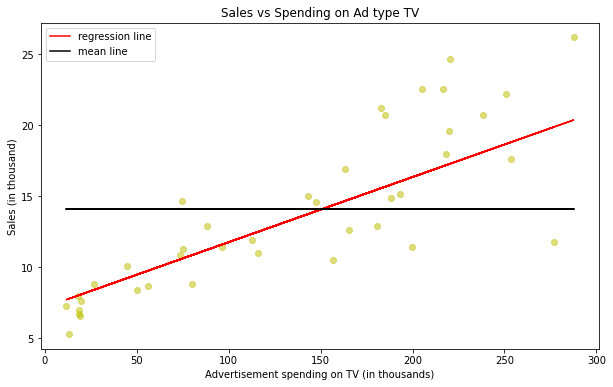

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(Xtest_tv, ytest_tv, c='y', alpha=0.5)
plt.plot(Xtest_tv, ypred_tv, c='red', label='regression line')
plt.plot(Xtest_tv, yavg_tv, c='black', label='mean line')

plt.xlabel('Advertisement spending on TV (in thousands)')
plt.ylabel('Sales (in thousand)' )
plt.title('Sales vs Spending on Ad type TV')
plt.legend()
plt.show()

The next question we can ask is whether there is a possibility to improve the model. For that, we can try having all ad types in the model instead of just the ad type TV and see if such a model can predict the sales even better.

### Multiple Linear Regression

* Extends simple linear regression to include multiple features.
* Each feature will have its own coefficient.
* The multiple linear regression equation takes the form: $\hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}x_{1} + \hat{\beta}_{2}x_{2} + ... + \hat{\beta}_{p}x_{p}$
    * where $p$ indicates the number of features i.e. predictor variables
    * in our case $p=3$, one for each ad type: TV, Radio and Newspaper
* Again, using the least square method we estimate the coefficients $\hat{\beta}$ for which the total residual error is minimized.

In [25]:
# prepare feature matrix and target vector
X = data.iloc[:,:-1]
y = data['Sales']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

lr_model = LinearRegression()
lr_model.fit(Xtrain, ytrain)

print(f'intercept: {lr_model.intercept_}')
print(f'coefficients: {[(i,j) for i,j in zip(data.columns[:3],lr_model.coef_)]}')
print(f'R_squared: {lr_model.score(Xtrain, ytrain)}')

intercept: 2.9242267872501237
coefficients: [('TV', 0.04558896802333739), ('Radio', 0.18653388574668245), ('Newspaper', -0.0006303191594022844)]
R_squared: 0.8873997664797107


The R-squared value has increased suggesting a better fit when using all ad types vs just ad type TV. Ad type radio has the highest coefficient suggesting that the variable contributes highest to sales. Ad type newspaper has negative coefficient suggesting that advertising spending on newspaper can actually have negative impact on sales but the effect is very little. 

Now that we have a multiple linear regression model based on all ad types, we can get sales predictions from any combination of TV, Radio and Newspaper advertising costs. We will use the test set to make these predictions.

In [26]:
ypred = lr_model.predict(Xtest)

print( [(i,j) for i,j in zip(data.columns[:3],Xtest.iloc[0])] )
print(ypred[0])

[('TV', 199.8), ('Radio', 3.1), ('Newspaper', 34.6)]
12.589348601212333


So if we spent \\$199.8 on TV ad, \\$3.1 in Radio ad and \\$34.6 in Newspaper ad in thousands of dollar, we can expect to sell approximately 1258 units of products in that market. 

Let's evaluate the performance of this model against the simple linear regression model.

In [27]:
rmse = sqrt(mean_squared_error(ytest, ypred))
print(f'RMSE: {rmse}')

RMSE: 1.484255024954556


Indeed adding the data from the two other ad types has resulted in a better model. The algorithm is not very accurate but can still make reasonably good predictions. 

Residual analysis is an important step in analyzing linear regression models. It can also provide some additional information regarding what's missing in the model. 

RSS: 88.12051916411399


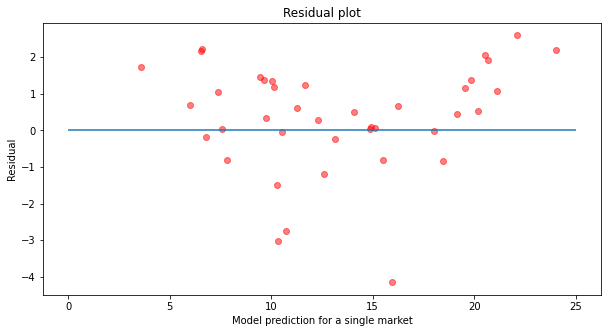

In [28]:
err = ytest - ypred
rss = ((err)**2).sum()
print(f'RSS: {rss}')

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(ypred, err, c='r', alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=25)
plt.xlabel('Model prediction for a single market')
plt.ylabel('Residual' )
plt.title('Residual plot')
plt.show()

In the residual plot above, each point is a single market, where the prediction made by the model is on the x-axis and the accuracy of the prediction is on the y-axis. The distance from the line at 0 is how bad the prediction was for that value. So 0 means the prediction was exact, positive value means prediction was too low and negative value means prediction was too high. 

We note that the residual plot exhibit some pattern. This suggests that the model has room for improvement. Many factors can contribute to the inaccuracy of the model. Having more data can help get best possible prediction. Perhaps the relationship between predictor variables and target is not linear and/or they do not have high enough correlation to predict the target value accurately. 

We can try omitting one of the variables and train a linear regression model again to see if that can help account for some of these inaccuracies. 